## Observations and Insights

1) The Pearson's correlation coefficient (r) between mouse weight and average tumor volume for Capomulin drug is 0.84. Therefore, there is a strong positive correlation between mouse weight and average tumor volume for Capomulin Drug.   

2) Capomulin & Ramicane appears to be the most promising drugs as for the most of the mouse treated with Capomulin and Ramicane drug, the final tumor volume is lowest as compared to other drugs(Could be because tumor volume is decreasing with the time).  

3) Capomulin & Ramicane has the highest number of data points as compared to other drugs. Therfore we can conclude that survival time of mouse is higher for these two as compared to other drugs. 

4) The r*2 value is 0.71. Therfore, the linear regression model is a good fit  and  approximately 71% of the observed variation can be explained by the model's inputs.



## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Finding the mean, median, variance, standard deviation, and standard error of the mean (SEM) . First do groupby on Drug Regimen and then calculate .
mouse_study_mean = mouse_study.groupby('Drug Regimen').mean()
mouse_study_median = mouse_study.groupby('Drug Regimen').median()
mouse_study_variance = mouse_study.groupby('Drug Regimen').var()
mouse_study_sd = mouse_study.groupby('Drug Regimen').std()
mouse_study_sem = mouse_study.groupby('Drug Regimen').sem()

# Calculate the mean, median, variance, standard deviation and SEM of the tumor volume for each regimen.
tumor_mean = mouse_study_mean["Tumor Volume (mm3)"]
tumor_median = mouse_study_median["Tumor Volume (mm3)"]
tumor_variance = mouse_study_variance["Tumor Volume (mm3)"]
tumor_sd = mouse_study_sd["Tumor Volume (mm3)"]
tumor_sem = mouse_study_sem["Tumor Volume (mm3)"]

#Create a dataframe for summary statistics

summary_tumor = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_variance,
                              "Standard Deviation": tumor_sd,
                              "SEM": tumor_sem
                             })
summary_tumor

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
#Calculate number of data points for each treatment regimen.
regimen_group = mouse_study.groupby('Drug Regimen')
regimen_count = regimen_group['Drug Regimen'].count()

regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

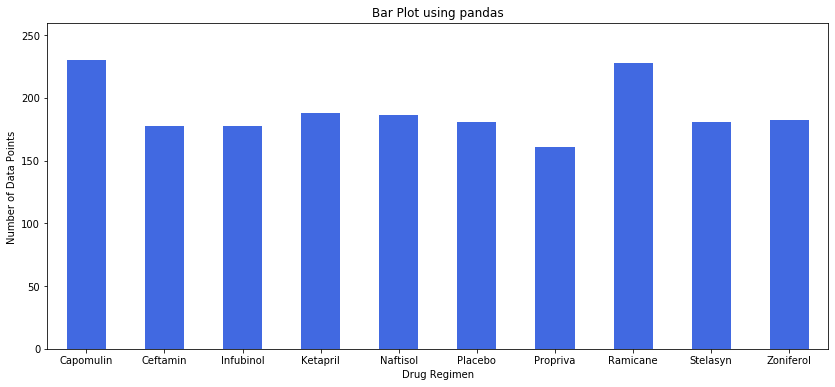

In [422]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen_chart = regimen_count.plot(kind= "bar",figsize =(14,6),rot = 'horizontal',width = 0.5,
                                   color = 'royalblue')

#set labels, title 
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Data Points ")
regimen_chart.set_title("Bar Plot using pandas")

# Set the upper and lower limits of our y axis
regimen_chart.set_ylim(0,260)

# save the figure 
plt.savefig('Bar Plot using Pandas')


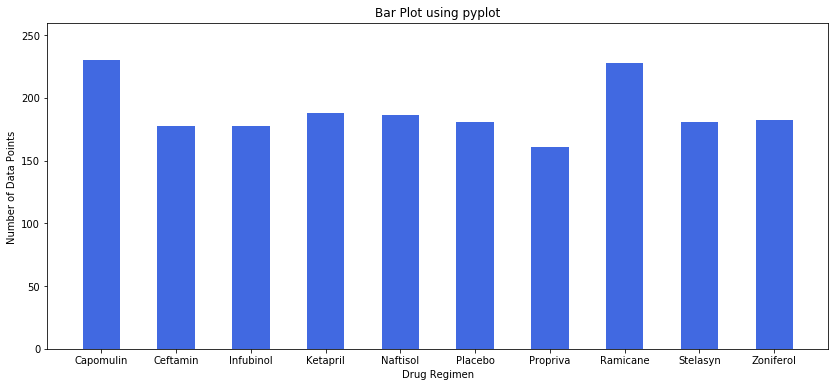

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot.
#Bar plot using the .keys
# Find the names of the drug regimen 
drug_names = regimen_count.keys()


#plot the bar chart using drug_names as x_axis and regimen_count as y_axis
plt.figure(figsize=(14,6))
plt.bar(drug_names, regimen_count , color = 'royalblue', align="center", width = 0.5)

# Set the labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points ")
plt.title("Bar Plot using pyplot")
# Set the upper and lower limits of our y axis
plt.ylim(0,260)

# save the figure 
plt.savefig('Bar Plot using Pandas')

plt.show()

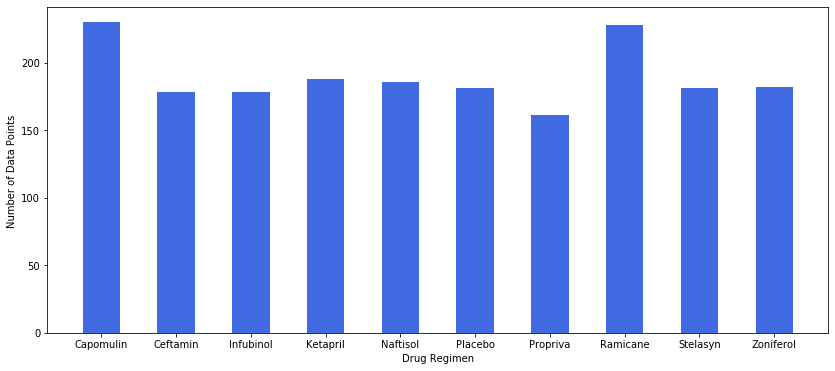

In [424]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Bar plot using the tick 
study_count = mouse_study.groupby('Drug Regimen').count()
study_count = study_count.reset_index()
x_axis = np.arange(len(study_count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(14,6))
plt.bar(x_axis, study_count["Mouse ID"] , color = 'royalblue', width=0.5, align="center")
plt.xticks(tick_locations,study_count["Drug Regimen"] )
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points ")
plt.show()

## Pie plots

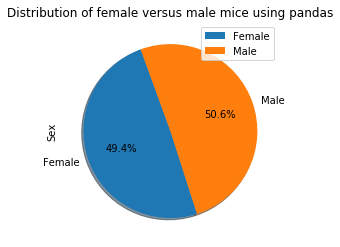

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group the data by sex
gender_group = mouse_study.groupby('Sex')

# Count the number of female and male mouse
gender_count = gender_group['Sex'].count()

# Find the gender list
gender_list = gender_count.keys()

# Plot the pie chart 
gender_pie_pandas = gender_count.plot( kind= "pie", y = gender_list, title = "Distribution of female versus male mice using pandas",
                                     autopct="%1.1f%%", shadow=True,startangle= 110, legend = True) 
plt.savefig('Pie Plot using Pandas')

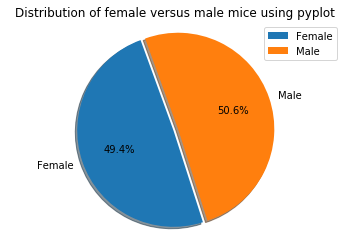

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0.05)
plt.pie(gender_count, explode=explode, labels=gender_list, 
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.axis("equal")
plt.legend(gender_list, loc="best")
plt.title("Distribution of female versus male mice using pyplot")
plt.savefig('Pie Plot using PyPlot')
plt.show()

## Quartiles, outliers and boxplots

In [8]:

# Group the mouse_study by 'Mouse ID' and 'Drug Regimen'
mouse_group = mouse_study.groupby('Mouse ID')

#Find the maximum value of a column and then reset the index
mouse_max = mouse_group.max().reset_index()

# Take the maximum Timepoint and Mouse ID from the mouse_max and then merge it to the original dataset by "Timepoint", "Mouse ID"
# That will return the final tumor volume corresponding to the max Timepoint and Mouse ID
tumor_volume_data = mouse_max[["Timepoint", "Mouse ID"]].merge(mouse_study, on = ["Timepoint", "Mouse ID"], how = "left")
tumor_volume_data

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,10,z435,Propriva,Female,12,26,48.710661,0
245,45,z578,Ramicane,Male,11,16,30.638696,0
246,45,z581,Infubinol,Female,24,25,62.754451,3
247,45,z795,Naftisol,Female,13,29,65.741070,3


In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
capomulin_data= tumor_volume_data.loc[tumor_volume_data["Drug Regimen"] == "Capomulin",:]
ramicane_data = tumor_volume_data.loc[tumor_volume_data["Drug Regimen"] == "Ramicane", :]
infubinol_data = tumor_volume_data.loc[tumor_volume_data["Drug Regimen"] == "Infubinol", :]
ceftamin_data = tumor_volume_data.loc[tumor_volume_data["Drug Regimen"] == "Ceftamin", :]

In [10]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Capomulin. 

# Calculate the final tumor volume of each mouse for capomulin drug regimen.
capomulin_vol = capomulin_data["Tumor Volume (mm3)"]

# Calculate IQR for Capomulin
capomulin_quartiles = capomulin_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin's final tumor volume is: {capomulin_lowerq} mm3")
print(f"The upper quartile of Capomulin's final tumor volume is: {capomulin_upperq} mm3")
print(f"The interquartile range of Capomulin's final tumor volume is: {capomulin_iqr}")
print(f"The the median of Capomulin's final tumor volume is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} mm3 could be outliers for Capomulin.")
print(f"Values above {capomulin_upper_bound} mm3 could be outliers for Capomulin.")

#Check if there is any outlier.
capomulin_outlier = capomulin_data.loc[(capomulin_vol < 
        capomulin_lower_bound) | (capomulin_vol > capomulin_upper_bound)]

print(f"There could be {len(capomulin_outlier)} outliers for Capomulin.")


# Print the outlier.
if len(capomulin_outlier) > 0:
   print(capomulin_outlier)

The lower quartile of Capomulin's final tumor volume is: 32.37735684 mm3
The upper quartile of Capomulin's final tumor volume is: 40.1592203 mm3
The interquartile range of Capomulin's final tumor volume is: 7.781863460000004
The the median of Capomulin's final tumor volume is: 38.125164399999996 
Values below 20.70456164999999 mm3 could be outliers for Capomulin.
Values above 51.83201549 mm3 could be outliers for Capomulin.
There could be 0 outliers for Capomulin.


In [11]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane.

# Calculate the final tumor volume of each mouse for Ramicane Drug.
ramicane_vol = ramicane_data["Tumor Volume (mm3)"]

# Calculate IQR
ramicane_quartiles = ramicane_vol.quantile([.25,.5,.75])
ramicane_lowerq =ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of Ramicane's final tumor volume is: {ramicane_lowerq} mm3")
print(f"The upper quartile of Ramicane's final tumor volume is: {ramicane_upperq} mm3")
print(f"The interquartile range of Ramicane's final tumor volume is: {ramicane_iqr}")
print(f"The the median of Ramicane's final tumor volume is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} mm3 could be outliers for Ramicane.")
print(f"Values above {ramicane_upper_bound} mm3 could be outliers for Ramicane.")

# Check if there is any outlier 
ramicane_outlier = ramicane_data.loc[(ramicane_vol < 
        ramicane_lower_bound) | (ramicane_vol > ramicane_upper_bound)]

print(f"There could be {len(ramicane_outlier)} outliers for Ramicane.")

# Print the outlier
if len(ramicane_outlier) > 0 :
    print(ramicane_outlier)

The lower quartile of Ramicane's final tumor volume is: 31.56046955 mm3
The upper quartile of Ramicane's final tumor volume is: 40.65900627 mm3
The interquartile range of Ramicane's final tumor volume is: 9.098536719999998
The the median of Ramicane's final tumor volume is: 36.56165229 
Values below 17.912664470000003 mm3 could be outliers for Ramicane.
Values above 54.30681135 mm3 could be outliers for Ramicane.
There could be 0 outliers for Ramicane.


In [19]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol.

# Calculate the final tumor volume of each mouse for Infubinol Drug .
infubinol_vol = infubinol_data["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_vol.quantile([.25,.5,.75])
infubinol_lowerq =infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of Infubinol's final tumor volume is: {infubinol_lowerq} mm3")
print(f"The upper quartile of Infubinol's final tumor volume is: {infubinol_upperq} mm3")
print(f"The interquartile range of Infubinol's final tumor volume is: {infubinol_iqr}")
print(f"The the median of Infubinol's final tumor volume is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} mm3 could be outliers for Infubinol.")
print(f"Values above {infubinol_upper_bound} mm3 could be outliers for Infubinol.")


# Check if there is any outlier.
infubinol_outlier = infubinol_data.loc[(infubinol_vol < 
        infubinol_lower_bound) | (infubinol_vol > infubinol_upper_bound)]

print(f"There could be {len(infubinol_outlier)} outliers for Infubinol.")


# Print the outlier.
infubinol_outlier

The lower quartile of Infubinol's final tumor volume is: 54.04860769 mm3
The upper quartile of Infubinol's final tumor volume is: 65.52574285 mm3
The interquartile range of Infubinol's final tumor volume is: 11.477135160000003
The the median of Infubinol's final tumor volume is: 60.16518046 
Values below 36.83290494999999 mm3 could be outliers for Infubinol.
Values above 82.74144559000001 mm3 could be outliers for Infubinol.
There could be 1 outliers for Infubinol.


,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,5,c326,Infubinol,Female,18,25,36.321346,0


In [20]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin.

# Calculate the final tumor volume of each mouse for Ceftamin Drug.
ceftamin_vol = ceftamin_data["Tumor Volume (mm3)"]


# Calculate the IQR.
ceftamin_quartiles = ceftamin_vol.quantile([.25,.5,.75])
ceftamin_lowerq =ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr =ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of Ceftamin's final tumor volume is: {ceftamin_lowerq} mm3")
print(f"The upper quartile of Ceftamin's final tumor volume is: {ceftamin_upperq} mm3")
print(f"The interquartile range of Ceftamin's final tumor volume is: {ceftamin_iqr}")
print(f"The the median of Ceftamin's final tumor volume is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} mm3 could be outliers for ceftamin.")
print(f"Values above {ceftamin_upper_bound} mm3 could be outliers for ceftamin.")

# Check if there is any outliers.

ceftamin_outlier = ceftamin_data.loc[(ceftamin_vol < 
        ceftamin_lower_bound) | (ceftamin_vol > ceftamin_upper_bound)]

print(f"There could be {len(ceftamin_outlier)} outliers for Ceftamin.")


# Print the outlier.
if len(ceftamin_outlier) > 0:
    print(ceftamin_outlier)

The lower quartile of Ceftamin's final tumor volume is: 48.72207785 mm3
The upper quartile of Ceftamin's final tumor volume is: 64.29983003 mm3
The interquartile range of Ceftamin's final tumor volume is: 15.577752179999997
The the median of Ceftamin's final tumor volume is: 59.85195552 
Values below 25.355449580000002 mm3 could be outliers for ceftamin.
Values above 87.66645829999999 mm3 could be outliers for ceftamin.
There could be 0 outliers for Ceftamin.


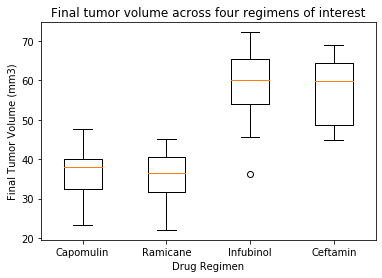

In [367]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [capomulin_vol, ramicane_vol,infubinol_vol ,ceftamin_vol]
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume across four regimens of interest')
ax1.boxplot(data, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin",])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

plt.savefig('Box plot')
plt.show()

## Line and scatter plots

In [368]:
# Find the data for the desired mouse.

mouse_id = 'r944'
just_one_mouse = mouse_study.loc[mouse_study["Mouse ID"] == mouse_id, :]
just_one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
381,r944,Capomulin,Male,12,25,0,45.000000,0
382,r944,Capomulin,Male,12,25,5,45.737145,0
383,r944,Capomulin,Male,12,25,10,46.544292,0
384,r944,Capomulin,Male,12,25,15,47.373423,0
385,r944,Capomulin,Male,12,25,20,43.225671,1
386,r944,Capomulin,Male,12,25,25,41.086991,1
387,r944,Capomulin,Male,12,25,30,41.680791,1
388,r944,Capomulin,Male,12,25,35,40.401765,2
389,r944,Capomulin,Male,12,25,40,41.042045,2
390,r944,Capomulin,Male,12,25,45,41.581521,2


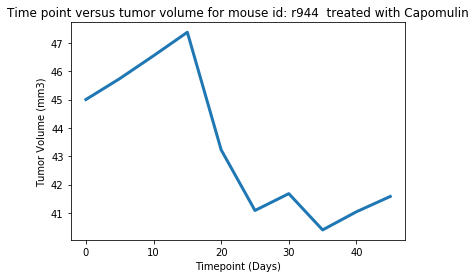

In [448]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Set the x_axis
x_axis_timepoint = just_one_mouse["Timepoint"]

# Set the y_axis
y_axis_tumor_vol = just_one_mouse["Tumor Volume (mm3)"]

plt.title(f'Time point versus tumor volume for mouse id: {mouse_id}  treated with Capomulin')
plt.plot(x_axis_timepoint, y_axis_tumor_vol, linewidth=3, markersize=10)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('Line plot')
plt.show()

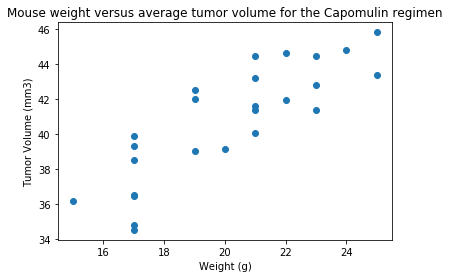

In [449]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Find the data for Capomulin Regimen.
capomulin_regimen = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin", :]

# Calculate the mean for each mouse. 
capomulin_avg = capomulin_regimen.groupby('Mouse ID').mean()

# Find the weight for each mouse.
mouse_weight = capomulin_avg["Weight (g)"]

# Find the average tumor volume for each mouse.
avg_tumor = capomulin_avg["Tumor Volume (mm3)"]

# Set x_axis as mouse_weight and y_axis as average tumor for scatter plot.
plt.scatter(mouse_weight, avg_tumor)

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse weight versus average tumor volume for the Capomulin regimen')
plt.savefig('Scatter Plot')
plt.show()

In [450]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
cor_coef = round(st.pearsonr(mouse_weight,avg_tumor)[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {cor_coef}.")


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


The r-squared is: 0.7088568047708717
The pvalue is: 1.3225722434712642e-07


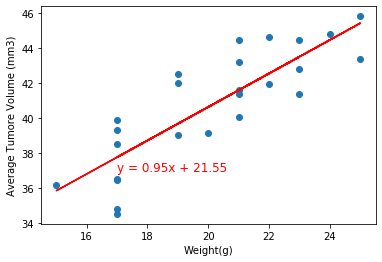

In [453]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Plot the linear regression model on top of the previous scatter plot.
x_values = mouse_weight
y_values = avg_tumor

# Perform a linear regression on mouse weight versus average tumor volume.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line 
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a Scatter Plot 
plt.scatter(x_values,y_values)

# Plot the regression line.
plt.plot(x_values,regress_values,"r-")

# Write the reqression line equation .
plt.annotate(line_eq,(17,37),fontsize=12,color="red")

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.savefig('Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print(f"The pvalue is: {pvalue}")
plt.savefig(' Linear Regression Plot')
plt.show()
